# Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

# Import Datasets

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Project Portfolio/Air Quality Detection /pollutant-standards-index-jogja-2020.csv")
df.head(10)

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,Moderate
1,1/2/2020,16,2,58,33,0,58,CO,Moderate
2,1/3/2020,12,2,46,18,0,46,CO,Good
3,1/4/2020,8,2,84,29,0,84,CO,Moderate
4,1/5/2020,8,3,50,0,0,50,CO,Good
5,1/6/2020,12,2,97,18,0,97,CO,Moderate
6,1/7/2020,10,3,70,0,0,70,CO,Moderate
7,1/8/2020,11,4,87,0,0,87,CO,Moderate
8,1/9/2020,10,4,118,5,0,118,CO,Unhealthy
9,1/10/2020,10,3,73,30,0,73,CO,Moderate


In [6]:
from prettytable import PrettyTable
# Tentukan nama kolom apa saja ketika inisialisasi tabel
airquality = PrettyTable(["Range", "Air Quality"])
# Tambahkan data baris
airquality.add_row(["0-50", "Good"])
airquality.add_row(["51-100", "Moderate"])
airquality.add_row(["101-200", "Unhealthy"])
airquality.add_row(["201-300", "Very Unhealthy"])
airquality.add_row(["300++", "Dangerous"])

**Penentuan Category Kualitas Udara**


**Berdasarkan peraturan yang telah ditetapkan pemerintah (Peraturan Menteri LHK RI P.14/MENLHK/SETJEN/KUM.1/7/2020), penetapan kategori adalah sebagai berikut:** 

In [7]:
# Tabel Perhitungan Kualitas Udara
print(airquality)

+---------+----------------+
|  Range  |  Air Quality   |
+---------+----------------+
|   0-50  |      Good      |
|  51-100 |    Moderate    |
| 101-200 |   Unhealthy    |
| 201-300 | Very Unhealthy |
|  300++  |   Dangerous    |
+---------+----------------+


# About Dataset

Dataset ini berisi pengukuran polusi udara yang terjadi di yogyakarta pada tahun 2020, seperti Particulate Matter (PM10), Sulfur Dioksida (SO2), Karbon Monoksida (CO), Ozon (O3), dan Sodium Dioksida (NO2). Pengukuran telah dikonversi ke Indeks Standar Polutan (PSI) atau Indeks Standar Pencemaran Udara (ISPU)

**Attribute Information**
*   Date - Tanggal pengukuran
*   PM10 - Pengukuran Partikulat Matter
*   SO2 - Pengukuran Sulfur Dioksida
*   CO - Pengukuran Karbon Monoksida
*   O3 - Pengukuran ozon
*   NO2 - Pengukuran Natrium DIoksida
*   Max - Nilai pengukuran tertinggi
*   Critical Component - Komponen yang memiliki nilai pengukuran tertinggi
*   Category - Kategori pencemaran udara, baik atau tidak

**Kekurangan Pada Data:**
Kolom NO2 hanya berisi nilai nol. Karena sang penulis data tidak dapat memperbaikinya, karena beliau belum memiliki sumber daya lain

**Sumber:** https://www.kaggle.com/datasets/adhang/air-quality-in-yogyakarta-indonesia-2020


# Analysing Dataset

In [ ]:
df.head()

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,Moderate
1,1/2/2020,16,2,58,33,0,58,CO,Moderate
2,1/3/2020,12,2,46,18,0,46,CO,Good
3,1/4/2020,8,2,84,29,0,84,CO,Moderate
4,1/5/2020,8,3,50,0,0,50,CO,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                366 non-null    object
 1   PM10                366 non-null    int64 
 2   SO2                 366 non-null    int64 
 3   CO                  366 non-null    int64 
 4   O3                  366 non-null    int64 
 5   NO2                 366 non-null    int64 
 6   Max                 366 non-null    int64 
 7   Critical Component  366 non-null    object
 8   Category            366 non-null    object
dtypes: int64(6), object(3)
memory usage: 25.9+ KB


In [ ]:
df.shape

(366, 9)

**Observasi:**
1.   Data berisi 9 kolom dengan 366 baris 
2.   Terdapat dua tipe kolom (Numerical & Categorical) pada data.
3.  Terdapat 6 kolom yang numerical, dan isi/variabel dari pada kolom tsb adalah kontinu 
4.   Terdapat 1 kolom berbentuk tanggal.
5.   Terdapat 2 kolom yang isinya berbentuk categorical pada kolom `weather`


# Data Preparation

## Missing values

In [ ]:
df.isnull().sum()

Date                  0
PM10                  0
SO2                   0
CO                    0
O3                    0
NO2                   0
Max                   0
Critical Component    0
Category              0
dtype: int64

In [ ]:
missing_values = ['Unknown / Non-Applicable', 'n/a', 'nan', '-', '--', 'null', ' ', '-1', -1]
df = pd.read_csv("/content/drive/MyDrive/Project Portfolio/Air Quality Detection /pollutant-standards-index-jogja-2020.csv", na_values = missing_values)
missing = df[['Date', 'PM10',	'SO2',	'CO',	'O3',	'NO2',	'Max',	'Critical Component',	'Category']].isnull().sum()
missing.sort_values()

Date                  0
PM10                  0
SO2                   0
CO                    0
O3                    0
NO2                   0
Max                   0
Critical Component    0
Category              0
dtype: int64

In [ ]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage


**Observasi:**

*   Setelah dicek missing value pada data ternyata tidak terdapat missing value pada data
*   Setelah dicek percentage missing value pada keseluruhan data juga tidak terlihat, yang artinya data ini sudah bersih

## Duplicated values

In [ ]:
df.duplicated().sum()

0

**Observasi:**

*   Setelah dicek duplicated value pada data ternyata tidak terdapat duplicated value pada data

# Exploratory Data Analysis (EDA)

In [ ]:
df.head(5)

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,Moderate
1,1/2/2020,16,2,58,33,0,58,CO,Moderate
2,1/3/2020,12,2,46,18,0,46,CO,Good
3,1/4/2020,8,2,84,29,0,84,CO,Moderate
4,1/5/2020,8,3,50,0,0,50,CO,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                366 non-null    object
 1   PM10                366 non-null    int64 
 2   SO2                 366 non-null    int64 
 3   CO                  366 non-null    int64 
 4   O3                  366 non-null    int64 
 5   NO2                 366 non-null    int64 
 6   Max                 366 non-null    int64 
 7   Critical Component  366 non-null    object
 8   Category            366 non-null    object
dtypes: int64(6), object(3)
memory usage: 25.9+ KB


**Observasi:**
*   Terdapat dua tipe kolom (`Numerical` & `Categorical`) pada data. 
*   Berikut kolom numerical : `PM10`, `SO2`, `CO`, `O3`, `NO2`, `Max`.
*   Berikut kolom numerical : `Critical Component` & `Category`.
*   Terdapat juga kolom `Date` yang berisikan tanggal.

## Statistical summary of columns 

In [ ]:
categoricals = ['Critical Component',	'Category']

numericals = ['PM10',	'SO2',	'CO',	'O3',	'NO2',	'Max']

**Bedasarkan kolom yang tersedia, akan lebih mudah untuk dianalisa apabila kolom tersebut dikategorikan menjadi sebagai berikut:**
* Numerical berisikan kolom dengan tipe data numeric saja
* Categorical berisikan kolom dengan tipe selain numeric, seperti nama, kata-kata, dll

In [ ]:
# numerical statistical sumary
df[numericals].describe()

,PM10,SO2,CO,O3,NO2,Max
count,366.000000,366.000000,366.000000,366.000000,366.0,366.000000
mean,19.699454,1.021858,31.161202,16.054645,0.0,35.800546
std,9.023704,1.012017,22.263521,14.172026,0.0,21.397890
min,3.000000,0.000000,0.000000,0.000000,0.0,11.000000
25%,14.000000,0.000000,18.000000,7.000000,0.0,21.000000
50%,18.500000,1.000000,23.500000,14.000000,0.0,28.000000
75%,23.000000,2.000000,40.000000,22.000000,0.0,45.000000
max,60.000000,6.000000,164.000000,81.000000,0.0,164.000000


**Observasi:**
*   Kolom `NO2` adalah kolom yang berisikan nilai 0 (nol), Jadi ini akan di drop nanti   
*   Dibagian min dan max masih make sense karena tidak ada nilai yang aneh dikeduanya (misal tertukar)
*   Mean ~ 50% (Median) pada `SO2` simetrik, nilai tidak berbeda jauh
* Mean > 50% (Median) pada kolom `PM10`, `CO`, `O3` & `MAX`, menunjukkan bahwa data memiliki distribusi yang sedikit condong positif
* Tidak ada Mean < 50% (Median) pada data, Tidak ada data yang menunjukkan berdistribusi negatif



In [ ]:
df[categoricals].describe()

,Critical Component,Category
count,366,366
unique,7,3
top,CO,Good
freq,205,293


In [ ]:
#Melihat Unique categoricals
for col in categoricals:
  print(col,"\n",df[col].describe(),"\n", df[col].value_counts(),"\n")

Critical Component 
 count     366
unique      7
top        CO
freq      205
Name: Critical Component, dtype: object 
 CO          205
O3           91
PM10         64
CO, PM10      2
PM10,O3       2
PM10, CO      1
PM10,CO       1
Name: Critical Component, dtype: int64 

Category 
 count      366
unique       3
top       Good
freq       293
Name: Category, dtype: object 
 Good         293
Moderate      67
Unhealthy      6
Name: Category, dtype: int64 



**Observasi:**
*   Pada kolom `Critical Component` memiliki 7	unique value yang berisikan parameter kualitas udara di yogyakarta pada tahun 2020 (`PM10`,	`SO2`,	`CO`,	`O3`,	`NO2`)
*   Pada kolom `Category`	memiliki 3	unique value yang berisikan kualitas udara di yogyakarta pada tahun 2020 ( Good, Moderate, Unhealthy )


## Univariate Analysis

#####Bar Plot untuk Melihat Category sebagai Target Variable

 Air Quality
 Good         80.05
Moderate     18.31
Unhealthy     1.64
Name: Category, dtype: float64


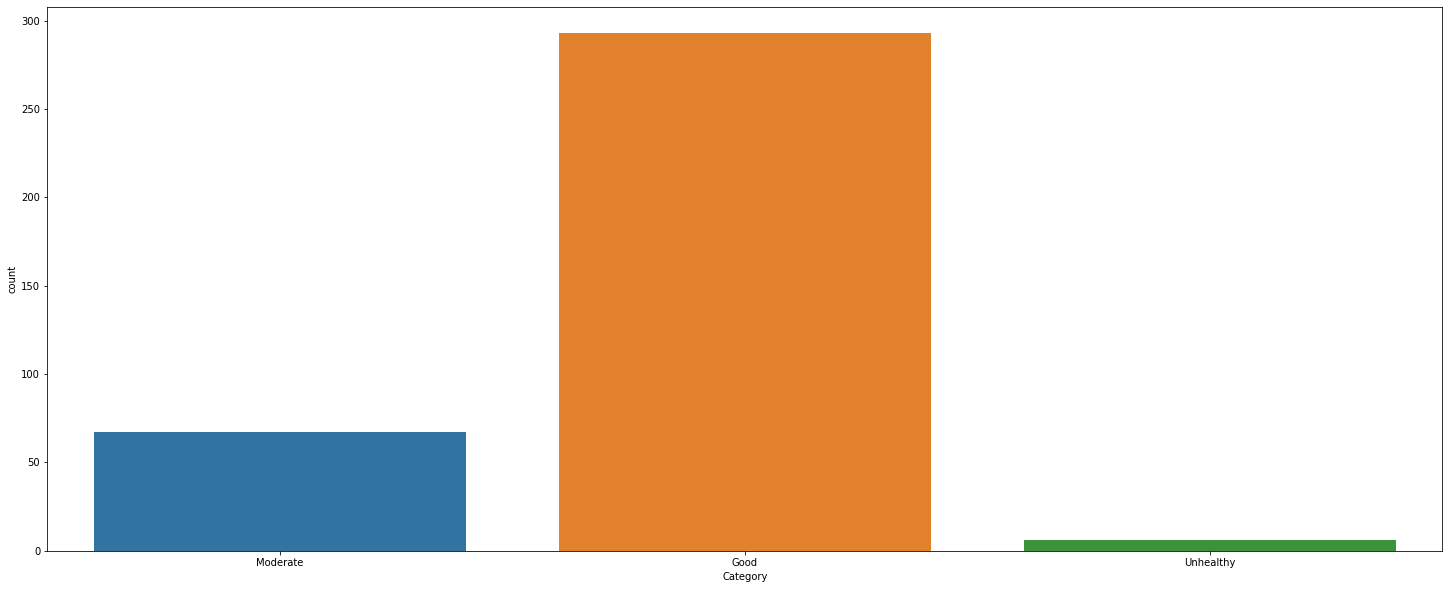

In [ ]:
#Membuat Bar Plot
plt.figure(figsize=(25,10))

ChurnBar = sns.countplot(df["Category"])
print(" Air Quality\n", round(df.Category.value_counts() / df.Category.count()*100,2))

**Observasi:**
*   Terdapat 3 kualitas udara pada data
*   Kualitas udara Good (baik) menjadi kulitas udara yang paling tinggi dideteksi pada tahun 2020 di yogyakarta sebersar 80% 
*   Terlihat kualitas udara yang kurang/tidak sehat, terlampau kecil pada tahun 2020  

##### Bar Plot untuk Mengetahui Distribusi Data Categorical

Value % of Critical Component column
CO          56.01
O3          24.86
PM10        17.49
CO, PM10     0.55
PM10,O3      0.55
PM10, CO     0.27
PM10,CO      0.27
Name: Critical Component, dtype: float64 

Value % of Category column
Good         80.05
Moderate     18.31
Unhealthy     1.64
Name: Category, dtype: float64 



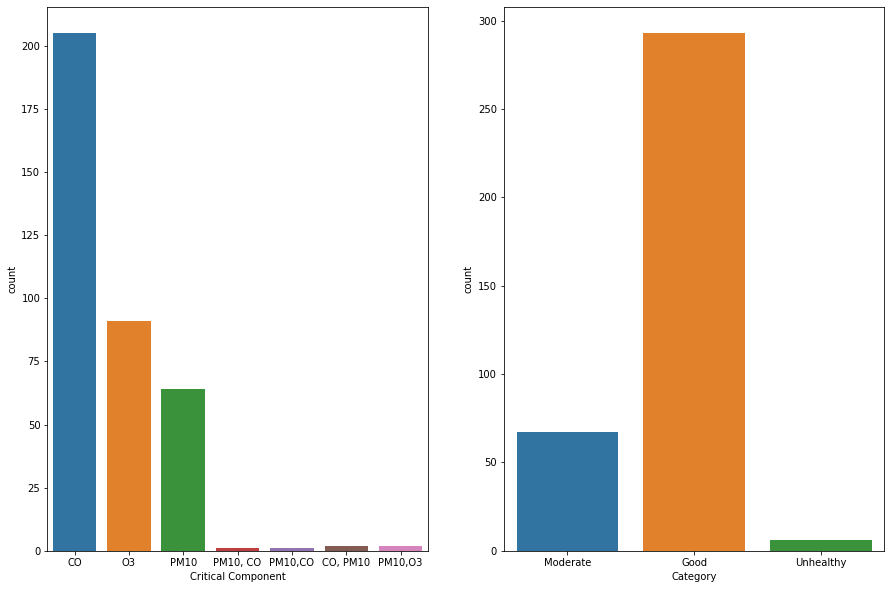

In [ ]:
#Memunculkan Percentage untuk categoricals
for col in categoricals:
  print(f"Value % of {col} column")
  print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Membuat Bar Plot untuk categoricals
plt.figure(figsize=(15,10))

for i,col in enumerate(categoricals):    
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(data = df, x = col)

**Observasi:**
*   Untuk kolom `Category` sebagaimana yang terpilih menjadi target dalam penelitian ini, telah dijelaskan di observasi sebelum ini 
*   Pada kolom `Critical Component` terlihat beberapa parameter kualitas udara yang dideteksi, namun kita tidak tahu kualitas udara apa yang dihasilkannya

##### Box Plot untuk Mendeteksi Outlier

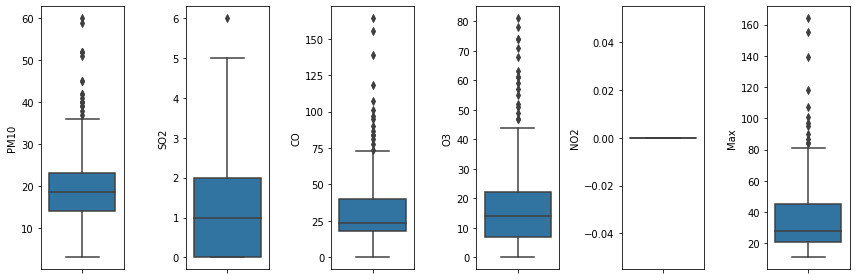

In [ ]:
#Membuat Boxplot
plt.figure(figsize=(12,4))

features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]])
    plt.tight_layout()

**Observasi:**
*   Dapat dilihat terdapat outlier yang dideteksi pada beberapa kolom
*   Kecuali pada kolom NO2, karena bersikan data hanya 0 (nol)
*   Namun data oulier ini tidak akan dibuang karena kita ingin tahu kualitas udara yang dihasilkan

KDE Plot untuk Mengetahui Distribusi Data Numerical

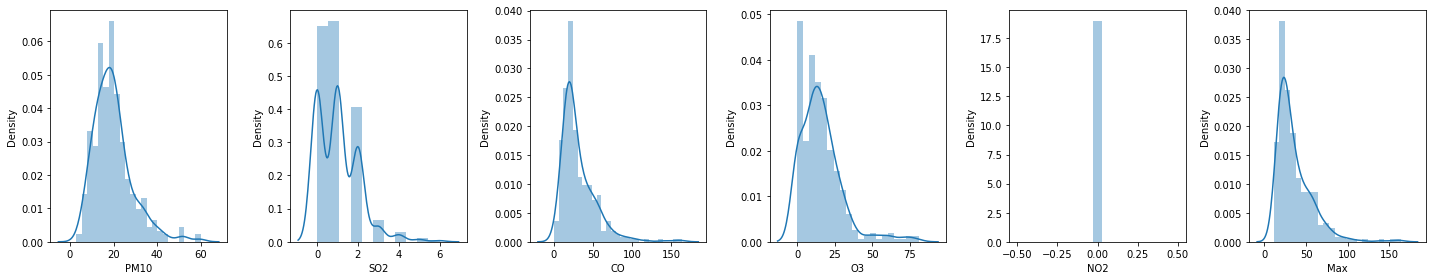

In [ ]:
#Membuat KDE Plot
plt.figure(figsize=(20,4))

features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
# Tabel Perhitungan Kualitas Udara
print(airquality)

+---------+----------------+
|  Range  |  Air Quality   |
+---------+----------------+
|   0-50  |      Good      |
|  51-100 |    Moderate    |
| 101-200 |   Unhealthy    |
| 201-300 | Very Unhealthy |
|  300++  |   Dangerous    |
+---------+----------------+


**Observasi:**
*   Pada kolom `PM10` dapat dilihat bahwa kualitas dengan nilai 20 adalah yang paling banyak dideteksi. Dan nilai tersebut termasuk category Good (Baik)
*   Pada kolom `SO2` dapat dilihat bahwa nilai kualitas udaranya masih dibawah 10, yang artinya nilai tersebut termasuk dicategory Good (Baik)
*   Pada kolom `CO` dapat dilihat bahwa kualitas dengan nilai dibawah 50 adalah yang paling banyak dideteksi. Dan nilai tersebut termasuk category Good (Baik)
*   Namun pada kolom `CO` juga terdapat kualitas udara dengan nilai diatas 50 yang berarti kualitas udaranya Moderate (Sedang) & juga terlihat ada nilai yang melebihi 100, bahkan ada yang melebihi 150. Maka terdapat kulitas udara yang Unhealthy (Tidak Sehat) dan kualitas udara inilah yang dikhawatirkan.
*   Pada kolom `O3` dapat dilihat bahwa kualitas dengan nilai dibawah 25 adalah yang paling banyak dideteksi. Dan nilai tersebut termasuk category Good (Baik)
*   Namun pada kolom `O3` juga terdapat kualitas udara dengan nilai diatas 50 yang berarti terdapat kualitas udara yang Moderate (Sedang).
*   Pada kolom `NO2` dapat dilihat bahwa nilai kualitas udaranya hanya 0 pada keseluruhan data, dan nilai tersebut termasuk category Good (Baik) 
*   Pada kolom `MAX` diisi dengan nilai tertinggi dari masing-masing kolom kualitas udara yang didapat dari data per-Date atau tanggal

# Data preprocessing

## Data preproc - Category

akan dilakukan dengan Ordinal Encode

In [ ]:
df['Category'].unique()

array(['Moderate', 'Good', 'Unhealthy'], dtype=object)

In [ ]:
map_Category = {'Unhealthy':3,
             'Moderate':2,
             'Good':1}
df['Category_cat'] = df['Category'].map(map_Category)
df[['Category','Category_cat']].head()

,Category,Category_cat
0,Moderate,2
1,Moderate,2
2,Good,1
3,Moderate,2
4,Good,1


In [ ]:
# Drop kolom Category yang belum menjadi encode
df = df.drop('Category', axis=1)

In [ ]:
df.head(5)

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category_cat
0,1/1/2020,30,2,69,19,0,69,CO,2
1,1/2/2020,16,2,58,33,0,58,CO,2
2,1/3/2020,12,2,46,18,0,46,CO,1
3,1/4/2020,8,2,84,29,0,84,CO,2
4,1/5/2020,8,3,50,0,0,50,CO,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                366 non-null    object
 1   PM10                366 non-null    int64 
 2   SO2                 366 non-null    int64 
 3   CO                  366 non-null    int64 
 4   O3                  366 non-null    int64 
 5   NO2                 366 non-null    int64 
 6   Max                 366 non-null    int64 
 7   Critical Component  366 non-null    object
 8   Category_cat        366 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 25.9+ KB


# Drop Colom `Date`, `NO2`, `Critical Component`

In [ ]:
# Drop kolom Date karena tidak mempengaruhi pengolahan data
df = df.drop('Date', axis=1)

In [ ]:
# Drop kolom Critical Component karena tidak mempengaruhi pengolahan data
df = df.drop('Critical Component', axis=1)

In [ ]:
# Drop kolom NO2 karena tidak mempengaruhi pengolahan data
df = df.drop('NO2', axis=1)

# Split data: train - validate - test

In [ ]:
from sklearn.model_selection import train_test_split

feature = df.drop(columns='Category_cat')
target = df[['Category_cat']]

feature_admit_pretrain, feature_admit_test, target_admit_pretrain, target_admit_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_admit_train, feature_admit_validation, target_admit_train, target_admit_validation = train_test_split(feature_admit_pretrain, target_admit_pretrain, test_size=0.20, random_state=42)

## Recheck VIF

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_admit_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,PM10,1.140778
2,SO2,1.933535
3,CO,10.925493
4,O3,2.485699
5,Max,12.262854


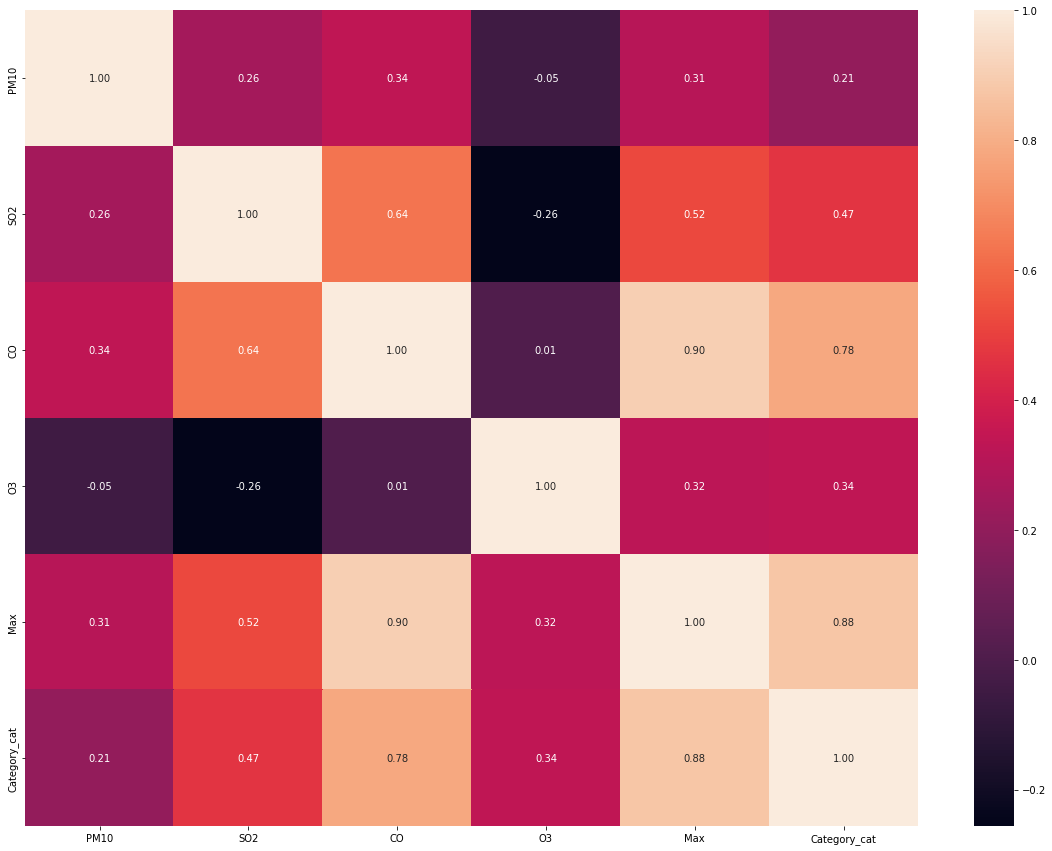

In [ ]:
# heatmap correlation
admit_train = pd.concat([feature_admit_train, target_admit_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

**Observasi:**

Dapat terlihat bahwa `CO` & `MAX` mempunyai correlation yang tinggi dengan targetnya. Namun setelah dicek pada tabel, nilai pada 2 kolom tersebut saling berkaitan. Maka dari itu kolom `MAX` terpilih untuk dieleiminasi karena isi dari kolom tersebut juga terdapat pada kolom-kolom lain.

## Drop Multicollinear Features

In [ ]:
# drop redundant features
feature_admit_train = feature_admit_train.drop(columns=['Max'])
feature_admit_validation = feature_admit_validation.drop(columns=['Max'])
feature_admit_test = feature_admit_test.drop(columns=['Max'])

In [ ]:
X = add_constant(feature_admit_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,PM10,1.132217
2,SO2,1.901081
3,CO,1.872321
4,O3,1.129021


In [ ]:
# Drop kolom Max untuk menghilangkan multicolinear pada pengolahan data
df = df.drop('Max', axis=1)
df.head()

,PM10,SO2,CO,O3,Category_cat
0,30,2,69,19,2
1,16,2,58,33,2
2,12,2,46,18,1
3,8,2,84,29,2
4,8,3,50,0,1


# K-NN Classification

In [ ]:
df.head()

,PM10,SO2,CO,O3,Category_cat
0,30,2,69,19,2
1,16,2,58,33,2
2,12,2,46,18,1
3,8,2,84,29,2
4,8,3,50,0,1


In [ ]:
# split the data 
from sklearn.model_selection import train_test_split

X = df.drop(columns='Category_cat').to_numpy()
y = df[['Category_cat']].to_numpy()
y = y.reshape(len(y),) # sklean formatting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# It's important to choose the right metric when doing classification
df['Category_cat'].value_counts()

1    293
2     67
3      6
Name: Category_cat, dtype: int64

In [ ]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},NaN,1
1,{'n_neighbors': 3},NaN,2
2,{'n_neighbors': 4},NaN,3
3,{'n_neighbors': 5},NaN,4
4,{'n_neighbors': 6},NaN,5
5,{'n_neighbors': 7},NaN,6
6,{'n_neighbors': 8},NaN,7


In [ ]:
# what if we also want to tune "weights" hyperparameter
# "uniform": all K neighbors have the same influence
# "distance": closer neighbor in those K neighbors has stronger influence
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

# now we use recall (sensitivity) as metric
knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [ ]:
# the results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'n_neighbors': 2, 'weights': 'uniform'}",NaN,1
1,"{'n_neighbors': 2, 'weights': 'distance'}",NaN,2
2,"{'n_neighbors': 3, 'weights': 'uniform'}",NaN,3
3,"{'n_neighbors': 3, 'weights': 'distance'}",NaN,4
4,"{'n_neighbors': 4, 'weights': 'uniform'}",NaN,5
5,"{'n_neighbors': 4, 'weights': 'distance'}",NaN,6
6,"{'n_neighbors': 5, 'weights': 'uniform'}",NaN,7
7,"{'n_neighbors': 5, 'weights': 'distance'}",NaN,8
8,"{'n_neighbors': 6, 'weights': 'uniform'}",NaN,9
9,"{'n_neighbors': 6, 'weights': 'distance'}",NaN,10


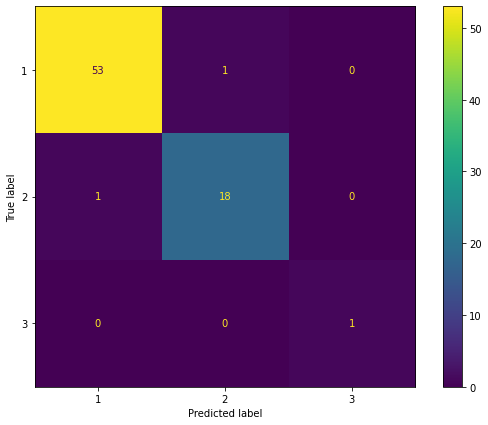

In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

## Acuracy K-NN

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98        54
           2       0.95      0.95      0.95        19
           3       1.00      1.00      1.00         1

    accuracy                           0.97        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.97      0.97      0.97        74



# Random Forest

In [ ]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 4.86 s, sys: 34.5 ms, total: 4.89 s
Wall time: 4.88 s


In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",NaN,1
22,"{'max_depth': 5, 'n_estimators': 30}",NaN,2
21,"{'max_depth': 5, 'n_estimators': 20}",NaN,3
20,"{'max_depth': 5, 'n_estimators': 10}",NaN,4
19,"{'max_depth': 4, 'n_estimators': 50}",NaN,5
18,"{'max_depth': 4, 'n_estimators': 40}",NaN,6
17,"{'max_depth': 4, 'n_estimators': 30}",NaN,7
16,"{'max_depth': 4, 'n_estimators': 20}",NaN,8
15,"{'max_depth': 4, 'n_estimators': 10}",NaN,9
14,"{'max_depth': 3, 'n_estimators': 50}",NaN,10


In [ ]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 2.19 s, sys: 13.8 ms, total: 2.2 s
Wall time: 2.24 s


In [ ]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'n_estimators': 20, 'max_depth': 4}",NaN,1
1,"{'n_estimators': 50, 'max_depth': 3}",NaN,2
2,"{'n_estimators': 40, 'max_depth': 5}",NaN,3
3,"{'n_estimators': 20, 'max_depth': 1}",NaN,4
4,"{'n_estimators': 50, 'max_depth': 5}",NaN,5
5,"{'n_estimators': 30, 'max_depth': 5}",NaN,6
6,"{'n_estimators': 30, 'max_depth': 2}",NaN,7
7,"{'n_estimators': 10, 'max_depth': 5}",NaN,8
8,"{'n_estimators': 30, 'max_depth': 4}",NaN,9
9,"{'n_estimators': 10, 'max_depth': 3}",NaN,10


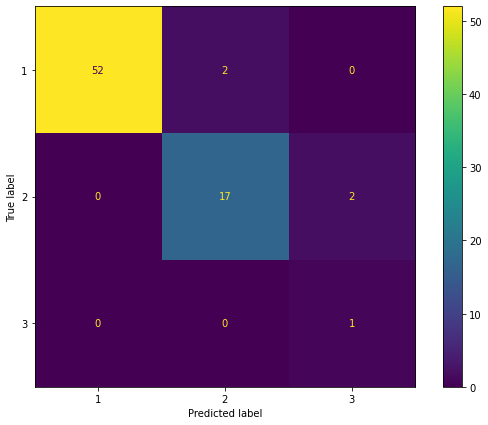

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

## Acuracy RF

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        54
           2       0.89      0.89      0.89        19
           3       0.33      1.00      0.50         1

    accuracy                           0.95        74
   macro avg       0.74      0.95      0.79        74
weighted avg       0.96      0.95      0.95        74

